In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.shape

(21, 2)

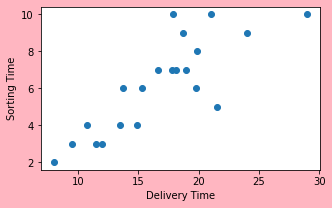

In [4]:
plt.figure(figsize =(5,3),facecolor ='lightpink')
plt.scatter(data['Delivery Time'],data['Sorting Time'])
plt.xlabel('Delivery Time')
plt.ylabel("Sorting Time")
plt.show()

In [5]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\tanuc\desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tanuc\desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

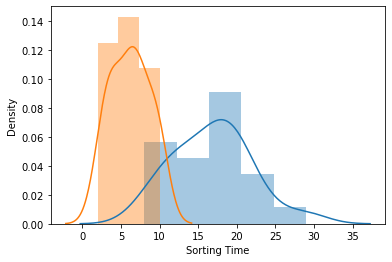

In [6]:
sns.distplot(data['Delivery Time'])
sns.distplot(data['Sorting Time'])

In [7]:
X=data['Delivery Time'].values.reshape(21,1)
Y =data['Sorting Time'].values.reshape(21,1)

In [8]:
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [9]:
Y

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [10]:
LR=LinearRegression()
model =LR.fit(X,Y)

In [11]:
model.coef_

array([[0.41374363]])

In [12]:
model.intercept_

array([-0.75667337])

In [13]:
prediction = model.predict(X)
prediction

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

In [14]:
pd.DataFrame({'Delivery Time':X.flatten(),
              'Sorting Time':Y.flatten(),
             "prediction":prediction.flatten()})

,Delivery Time,Sorting Time,prediction
0,21.00,10,7.931943
1,13.50,4,4.828866
2,19.75,6,7.414763
3,24.00,9,9.173174
4,29.00,10,11.241892
5,15.35,6,5.594291
6,19.00,7,7.104456
7,9.50,3,3.173891
8,17.90,10,6.649338
9,18.75,9,7.001020


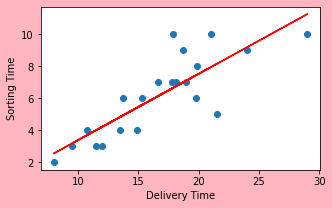

In [15]:
plt.figure(figsize =(5,3),facecolor ='lightpink')
plt.scatter(data['Delivery Time'],data['Sorting Time'])
plt.plot(data['Delivery Time'],prediction,color='red')
plt.xlabel('Delivery Time')
plt.ylabel("Sorting Time")
plt.show()

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

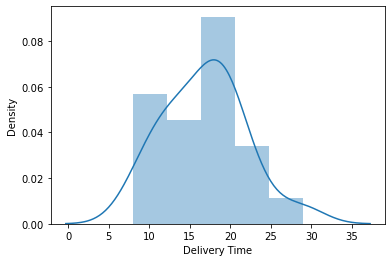

In [24]:
sns.distplot(data['Delivery Time'])

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

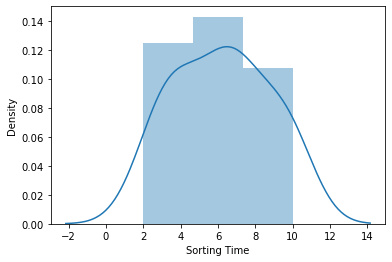

In [25]:

sns.distplot(data['Sorting Time'])

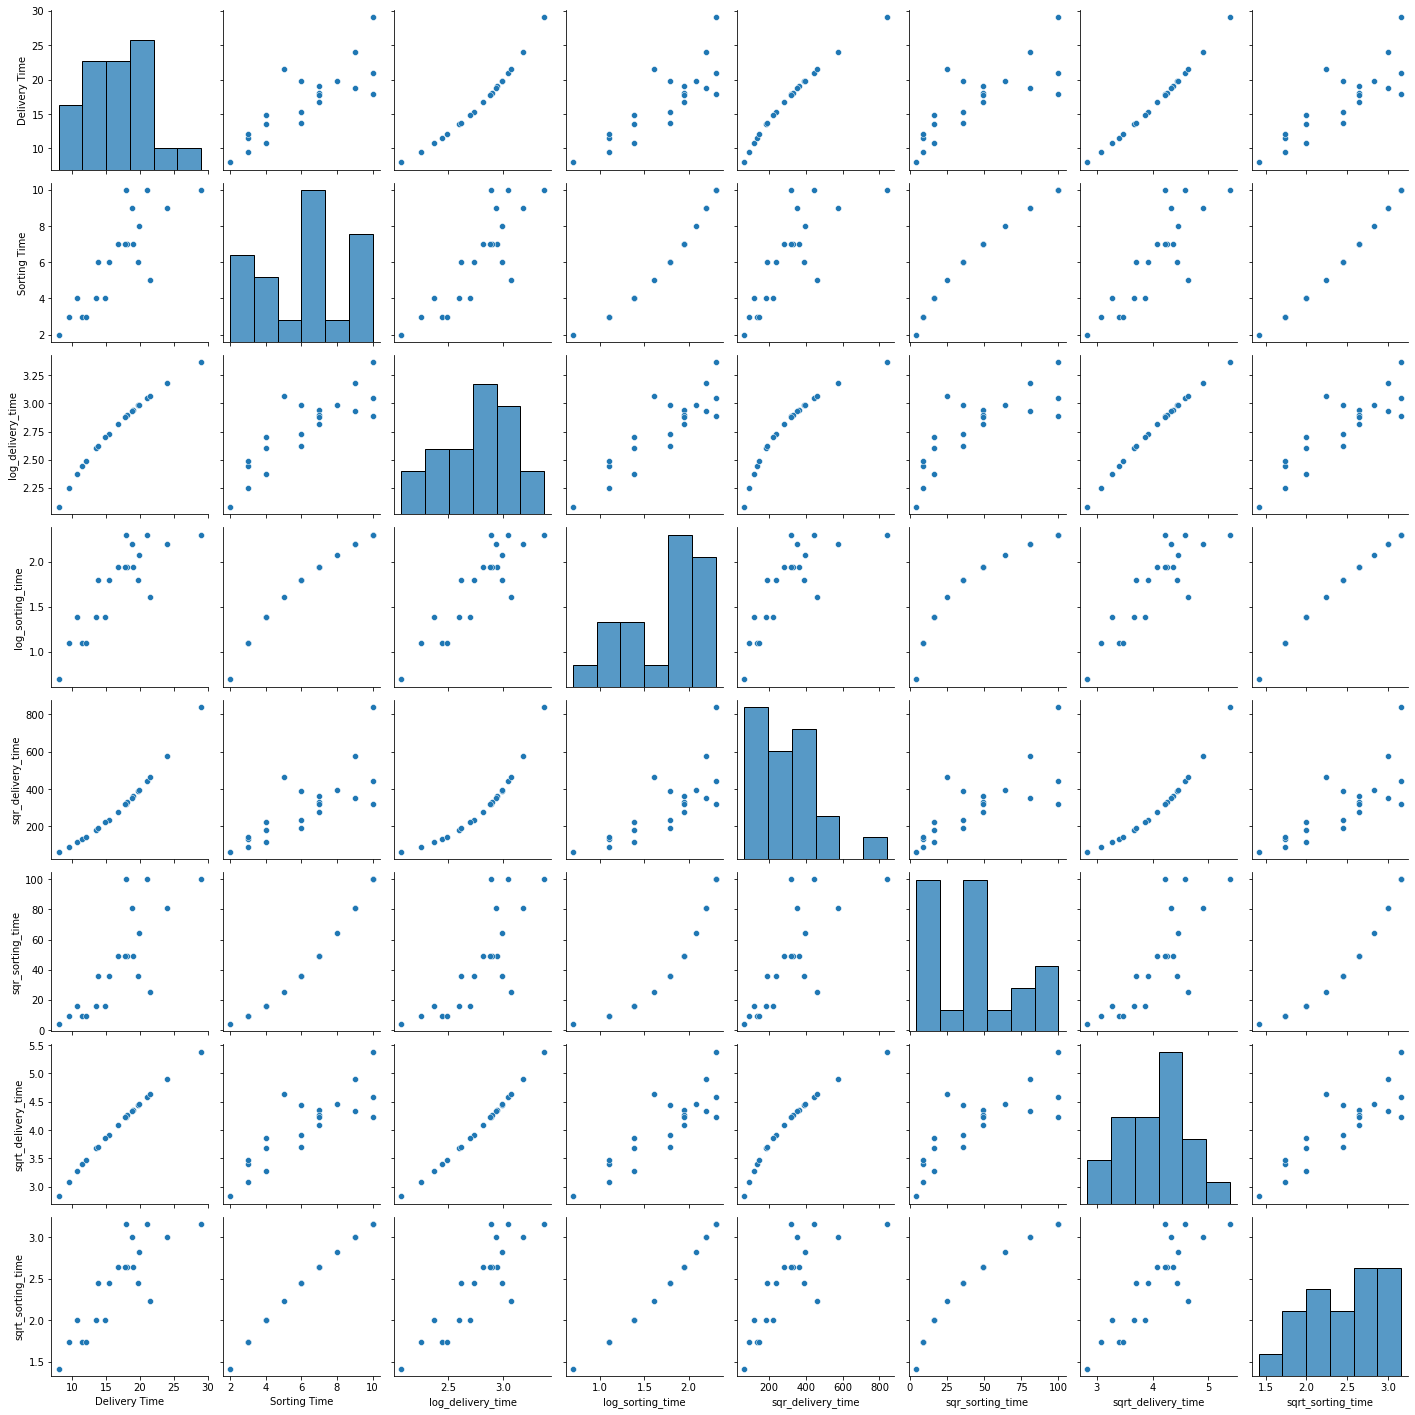

In [26]:
sns.pairplot(data)

# Transformation for Continuous Variable 

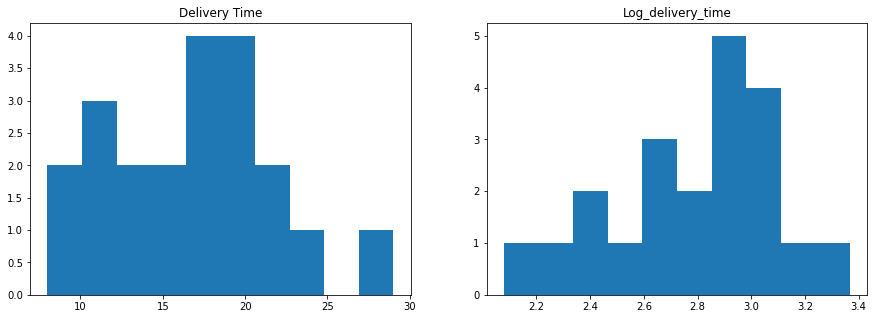

In [17]:

# log trasformation :
data['log_delivery_time']= np.log(data["Delivery Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Delivery Time']);ax[0].set_title("Delivery Time")
ax[1].hist(data['log_delivery_time']);ax[1].set_title("Log_delivery_time")
plt.show()


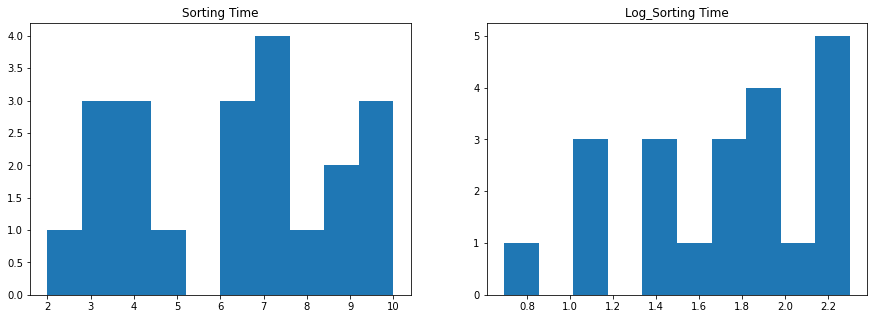

In [18]:

data['log_sorting_time']= np.log(data["Sorting Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Sorting Time']);ax[0].set_title("Sorting Time")
ax[1].hist(data['log_sorting_time']);ax[1].set_title("Log_Sorting Time")
plt.show()

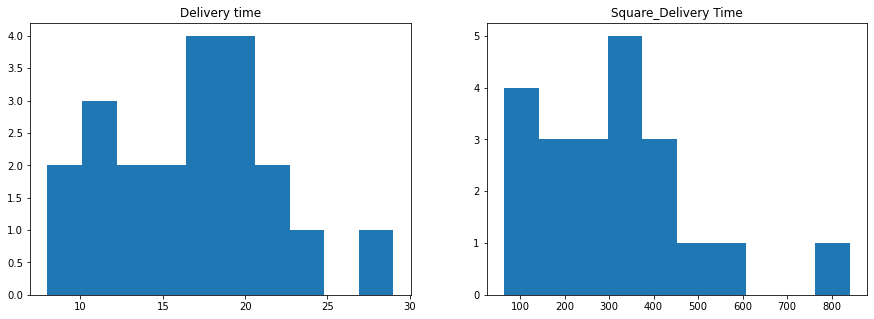

In [19]:

# square trasformation :
data['sqr_delivery_time']= np.square(data["Delivery Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Delivery Time']);ax[0].set_title("Delivery time")
ax[1].hist(data['sqr_delivery_time']);ax[1].set_title("Square_Delivery Time")
plt.show()


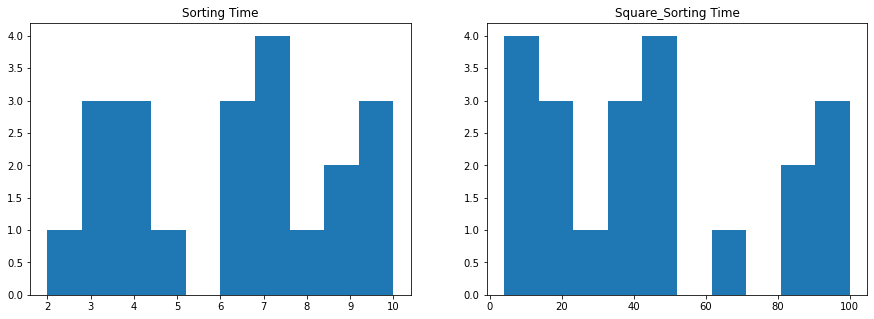

In [21]:
data['sqr_sorting_time']= np.square(data["Sorting Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Sorting Time']);ax[0].set_title("Sorting Time")
ax[1].hist(data['sqr_sorting_time']);ax[1].set_title("Square_Sorting Time")
plt.show()

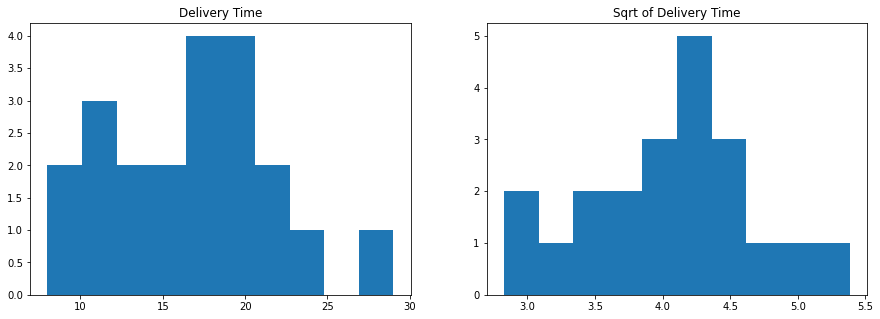

In [22]:
# square root trasformation :
data['sqrt_delivery_time']= np.sqrt(data["Delivery Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Delivery Time']);ax[0].set_title("Delivery Time")
ax[1].hist(data['sqrt_delivery_time']);ax[1].set_title("Sqrt of Delivery Time")
plt.show()


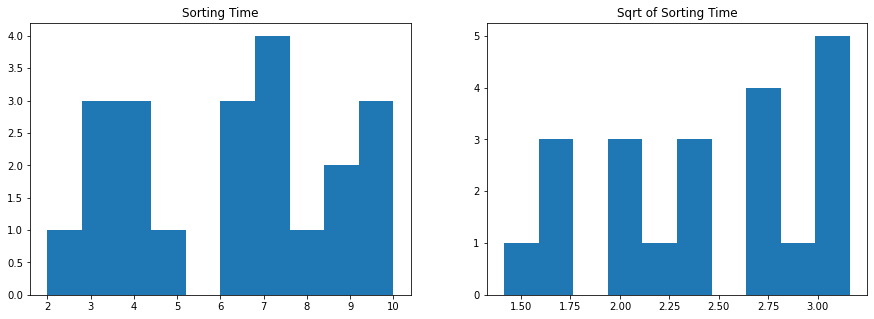

In [23]:

data['sqrt_sorting_time']= np.sqrt(data["Sorting Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Sorting Time']);ax[0].set_title("Sorting Time")
ax[1].hist(data['sqrt_sorting_time']);ax[1].set_title("Sqrt of Sorting Time")
plt.show()

In [25]:
data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [59]:
r2_score(data['Sorting Time'],prediction)

0.682271474841723

In [27]:
model2= smf.ols(" delivery_time~sorting_time",data=data1).fit()
model2

In [28]:
model2.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        17:13:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Manual prediction for say sorting time 5
delivery_time =( 6.582734)+(1.649020)*(5)
delivery_time 

14.827834

In [45]:
new = pd.Series([5,8])
new

0    5
1    8
dtype: int64

In [46]:
data_pred=pd.DataFrame(new,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [61]:
model.predict(data_pred)

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[1.31204477],
       [2.55327566]])